In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Detecção de pele com faixa de pexels definidas

In [51]:
def deteccaoPeleFaixa(img, peleMin, peleMax, colorTransformacao):
    # Convertendo imagem para a transformação de cor
    imagemConvertida = cv2.cvtColor(img, colorTransformacao)

    # aplica os niveis minimo e maximo de cor definido no parametro
    peleMascara = cv2.inRange(imagemConvertida, peleMin, peleMax)

    # aplicando erosão e dilatação na mascara, usando kernel elíptico
    # para melhor desempenho na aplicação da mascara na pele
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11))
    peleMascara = cv2.erode(peleMascara, kernel, iterations = 2)
    peleMascara = cv2.dilate(peleMascara, kernel, iterations = 2)

    # Aplicando o filtro blur para tirar o ruido da mascara
    peleMascara = cv2.GaussianBlur(peleMascara, (3, 3), 0)
    
    # aplicando a mascara na imagem para pegar somente a zona de interesse
    pele = cv2.bitwise_and(img, img, mask = peleMascara)
    
    # convertendo imagem e resultado para rgb
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    pele = cv2.cvtColor(pele, cv2.COLOR_BGR2RGB)
    
    #mostando os resultados
    fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(15, 10))
    ax[0].imshow(img)
    ax[1].imshow(peleMascara)
    ax[2].imshow(pele)

### Lendo imagem

In [158]:
imagens = []

imagens.append(cv2.imread('paolla.jpg'))
imagens.append(cv2.imread('img2.png'))
imagens.append(cv2.imread('img3.jpg'))

### Aplicando a função de detecção de pele com HSV

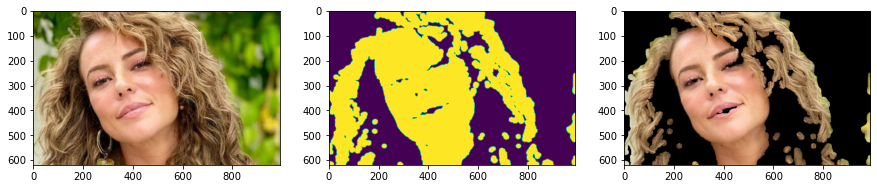

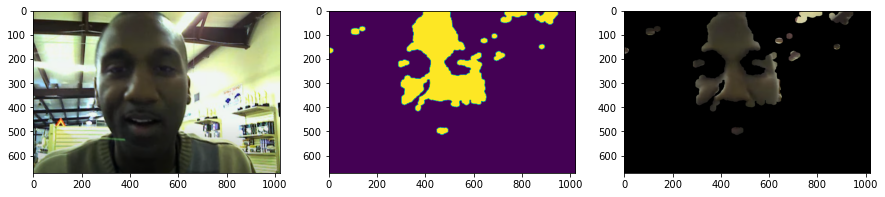

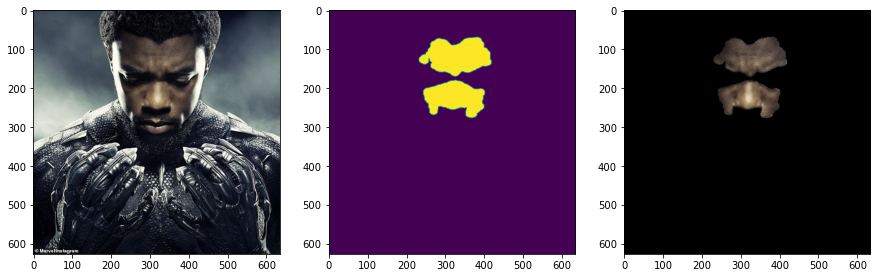

In [160]:
# niveis de cores definidos a partir do transformção da cor da imagem
peleMin = np.array([0, 25, 37], dtype='uint8')
peleMax = np.array([30, 180, 255], dtype='uint8')

for img in imagens:
    # aplicando função de detecçao de pele
    deteccaoPeleFaixa(img=img, peleMin= peleMin, peleMax= peleMax, colorTransformacao=cv2.COLOR_BGR2HSV)

### Aplicando a função de detecção de pele com YCrCb

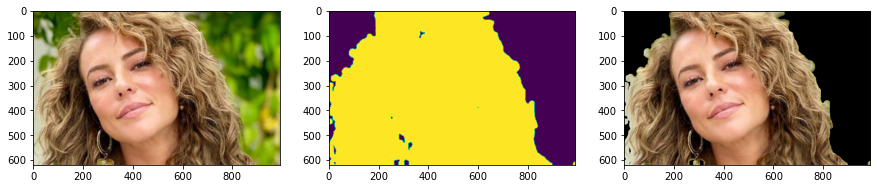

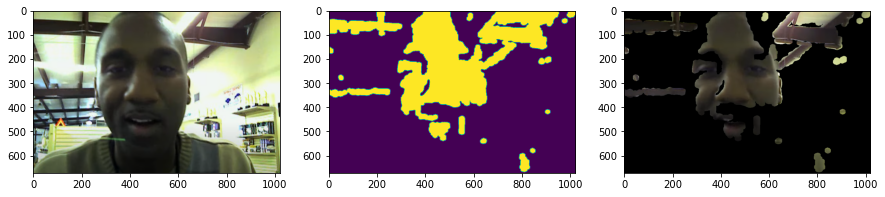

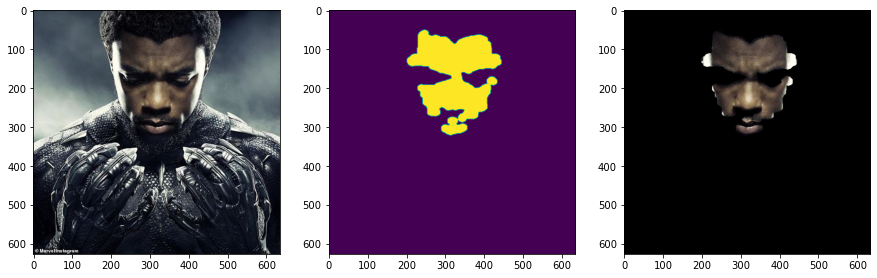

In [161]:
# niveis de cores definidos a partir do transformção da cor da imagem
min_YCrCb = np.array([0,129,93],np.uint8)
max_YCrCb = np.array([255,255,180],np.uint8)

for img in imagens:
    # aplicando função de detecçao de pele
    deteccaoPeleFaixa(img=img, peleMin= min_YCrCb, peleMax= max_YCrCb, colorTransformacao=cv2.COLOR_BGR2YCR_CB)